In [1]:
#Import general python packages
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

###  Import the movie review data as a data frame and ensure that the data is loaded properly.

In [2]:
# Read the "labeledTrainData.tsv" file 
df =pd.read_csv('C:\\Users\\Yousof\\Desktop\\DSC 550\\Week 3\\labeledTrainData.tsv', delimiter='\t')
df

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...
...,...,...,...
24995,3453_3,0,It seems like more consideration has gone into...
24996,5064_1,0,I don't believe they made this film. Completel...
24997,10905_3,0,"Guy is a loser. Can't get girls, needs to buil..."
24998,10194_3,0,This 30 minute documentary Buñuel made in the ...


### 2. How many of each positive and negative reviews are there?

In [3]:
# Import textblob
from textblob import TextBlob
# Import the nltk library
import nltk

In [4]:
# Displaying shape of dataset
# Displaying posetive and negetive reviews with sentiment analysis
print('df size:' ,df.shape)
df.groupby("sentiment").count()

df size: (25000, 3)


,id,review
sentiment,,
0,12500,12500
1,12500,12500


### 3. Use TextBlob to classify each movie review as positive or negative. Assume that a polarity score greater than or equal to zero is a positive sentiment and less than 0 is a negative sentiment.

In [5]:
from textblob import TextBlob

In [6]:
def sentiment_func(review):
    try:
        return TextBlob(review).sentiment 
    except:
        return None 

In [7]:
# create 'review_pol_sub' to display apply sentiment_func
df['review_pol_sub'] = df['review'].apply(sentiment_func)

In [8]:
# Create new column 'review_pol_sub'
# Review polarity and subjectivity of each reviews 
df['polarity'] = df['review_pol_sub'].apply(lambda x: x[0])
df['subjectivity'] = df['review_pol_sub'].apply(lambda x: x[1])

In [9]:
df.head()

,id,sentiment,review,review_pol_sub,polarity,subjectivity
0,5814_8,1,With all this stuff going down at the moment w...,"(0.001276742581090417, 0.6067460317460317)",0.001277,0.606746
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi...","(0.2563492063492064, 0.5311111111111111)",0.256349,0.531111
2,7759_3,0,The film starts with a manager (Nicholas Bell)...,"(-0.05394123606889564, 0.5629331306990881)",-0.053941,0.562933
3,3630_4,0,It must be assumed that those who praised this...,"(0.1347530864197531, 0.4929012345679012)",0.134753,0.492901
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...,"(-0.024841720779220786, 0.45981782106782115)",-0.024842,0.459818


### 4. Check the accuracy of this model. Is this model better than random guessing?

In [10]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
nb_samples = 1000
x, y = make_classification(n_samples=nb_samples, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [11]:
print(accuracy_score(ytest, model.predict(xtest)))

0.92


In [12]:
 def pos_or_neg(polarity):
    if polarity < 0:
        return 'negative'
    else:
        return 'positive'

In [13]:
#df['pos_or_neg'] = df['review'].apply(polarity_func)
#df.head()

In [14]:
#df.groupby(['sentiment','pos_or_neg'])['polarity'].count()

In [15]:
#accuracy = ((positive+negative)/(true_positive+true_negative))*100

In [16]:
#accuracy = ((correct_positive_predictions+correct_negative_predictions)/(true_positive+true_negative))*100

Based on the accuricy of model result I think this model is better than random guessing

# Part 2: Prepping Text for a Custom Model

In [17]:
# Convert 'review' column to lowercase
df['review'].str.lower()

0        with all this stuff going down at the moment w...
1        \the classic war of the worlds\" by timothy hi...
2        the film starts with a manager (nicholas bell)...
3        it must be assumed that those who praised this...
4        superbly trashy and wondrously unpretentious 8...
                               ...                        
24995    it seems like more consideration has gone into...
24996    i don't believe they made this film. completel...
24997    guy is a loser. can't get girls, needs to buil...
24998    this 30 minute documentary buñuel made in the ...
24999    i saw this movie as a child and it broke my he...
Name: review, Length: 25000, dtype: object

In [18]:
def lower(string: str):
    return string.lower()
df["newReview"] = df["review"].apply(lambda d : lower(d))
df["newReview"] 

0        with all this stuff going down at the moment w...
1        \the classic war of the worlds\" by timothy hi...
2        the film starts with a manager (nicholas bell)...
3        it must be assumed that those who praised this...
4        superbly trashy and wondrously unpretentious 8...
                               ...                        
24995    it seems like more consideration has gone into...
24996    i don't believe they made this film. completel...
24997    guy is a loser. can't get girls, needs to buil...
24998    this 30 minute documentary buñuel made in the ...
24999    i saw this movie as a child and it broke my he...
Name: newReview, Length: 25000, dtype: object

### 2. Remove punctuation and special characters from the text.

In [19]:
# Remove punctuation and keep the lower case
df['review'].str.replace('[^\w\s]','')
#df['review'].str.replace('[^\w\s]','').str.lower()

C:\Users\Yousof\AppData\Local\Temp/ipykernel_3444/4218382656.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'].str.replace('[^\w\s]','')


0        With all this stuff going down at the moment w...
1        The Classic War of the Worlds by Timothy Hines...
2        The film starts with a manager Nicholas Bell g...
3        It must be assumed that those who praised this...
4        Superbly trashy and wondrously unpretentious 8...
                               ...                        
24995    It seems like more consideration has gone into...
24996    I dont believe they made this film Completely ...
24997    Guy is a loser Cant get girls needs to build u...
24998    This 30 minute documentary Buñuel made in the ...
24999    I saw this movie as a child and it broke my he...
Name: review, Length: 25000, dtype: object

In [20]:
# Remove stop words
#Convert 'review' column to lowercase
# Remove punctuation and special characters from the 'review' column
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
df1 = df["review"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

df["review"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))\
.str.replace('[^\w\s]','').str.lower()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yousof\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


C:\Users\Yousof\AppData\Local\Temp/ipykernel_3444/2091263737.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  df["review"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))\


0        with stuff going moment mj ive started listeni...
1        the classic war worlds timothy hines entertain...
2        the film starts manager nicholas bell giving w...
3        it must assumed praised film the greatest film...
4        superbly trashy wondrously unpretentious 80s e...
                               ...                        
24995    it seems like consideration gone imdb reviews ...
24996    i believe made film completely unnecessary the...
24997    guy loser cant get girls needs build up picked...
24998    this 30 minute documentary buñuel made early 1...
24999    i saw movie child broke heart no story unfinis...
Name: review, Length: 25000, dtype: object

 ### Step 1: Get the stemmed data using the same process you did in Week 3.

In [21]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [22]:
import string
import re
pd.set_option('display.max_colwidth', 100)
stopwords = nltk.corpus.stopwords.words('english')


In [23]:
def clean_text(text):
    text = "".join([c for c in text if c not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [24]:
df['review_nostop'] = df['review'].apply(lambda  x: clean_text(x))
df.head()

,id,sentiment,review,review_pol_sub,polarity,subjectivity,newReview,review_nostop
0,5814_8,1,"With all this stuff going down at the moment with MJ i've started listening to his music, watchi...","(0.001276742581090417, 0.6067460317460317)",0.001277,0.606746,"with all this stuff going down at the moment with mj i've started listening to his music, watchi...","[With, stuff, going, moment, MJ, ive, started, listening, music, watching, odd, documentary, wat..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hines is a very entertaining film that obviously goe...","(0.2563492063492064, 0.5311111111111111)",0.256349,0.531111,"\the classic war of the worlds\"" by timothy hines is a very entertaining film that obviously goe...","[The, Classic, War, Worlds, Timothy, Hines, entertaining, film, obviously, goes, great, effort, ..."
2,7759_3,0,The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Pr...,"(-0.05394123606889564, 0.5629331306990881)",-0.053941,0.562933,the film starts with a manager (nicholas bell) giving welcome investors (robert carradine) to pr...,"[The, film, starts, manager, Nicholas, Bell, giving, welcome, investors, Robert, Carradine, Prim..."
3,3630_4,0,"It must be assumed that those who praised this film (\the greatest filmed opera ever,\"" didn't I...","(0.1347530864197531, 0.4929012345679012)",0.134753,0.492901,"it must be assumed that those who praised this film (\the greatest filmed opera ever,\"" didn't i...","[It, must, assumed, praised, film, greatest, filmed, opera, ever, didnt, I, read, somewhere, eit..."
4,9495_8,1,"Superbly trashy and wondrously unpretentious 80's exploitation, hooray! The pre-credits opening ...","(-0.024841720779220786, 0.45981782106782115)",-0.024842,0.459818,"superbly trashy and wondrously unpretentious 80's exploitation, hooray! the pre-credits opening ...","[Superbly, trashy, wondrously, unpretentious, 80s, exploitation, hooray, The, precredits, openin..."


In [25]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()


In [26]:
# Stem the text
def stemming (tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [27]:
df['review_stemmed'] = df['review_nostop'].apply(lambda x: stemming(x))
df.head()

,id,sentiment,review,review_pol_sub,polarity,subjectivity,newReview,review_nostop,review_stemmed
0,5814_8,1,"With all this stuff going down at the moment with MJ i've started listening to his music, watchi...","(0.001276742581090417, 0.6067460317460317)",0.001277,0.606746,"with all this stuff going down at the moment with mj i've started listening to his music, watchi...","[With, stuff, going, moment, MJ, ive, started, listening, music, watching, odd, documentary, wat...","[with, stuff, go, moment, MJ, ive, start, listen, music, watch, odd, documentari, watch, the, wi..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hines is a very entertaining film that obviously goe...","(0.2563492063492064, 0.5311111111111111)",0.256349,0.531111,"\the classic war of the worlds\"" by timothy hines is a very entertaining film that obviously goe...","[The, Classic, War, Worlds, Timothy, Hines, entertaining, film, obviously, goes, great, effort, ...","[the, classic, war, world, timothi, hine, entertain, film, obvious, goe, great, effort, length, ..."
2,7759_3,0,The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Pr...,"(-0.05394123606889564, 0.5629331306990881)",-0.053941,0.562933,the film starts with a manager (nicholas bell) giving welcome investors (robert carradine) to pr...,"[The, film, starts, manager, Nicholas, Bell, giving, welcome, investors, Robert, Carradine, Prim...","[the, film, start, manag, nichola, bell, give, welcom, investor, robert, carradin, primal, park,..."
3,3630_4,0,"It must be assumed that those who praised this film (\the greatest filmed opera ever,\"" didn't I...","(0.1347530864197531, 0.4929012345679012)",0.134753,0.492901,"it must be assumed that those who praised this film (\the greatest filmed opera ever,\"" didn't i...","[It, must, assumed, praised, film, greatest, filmed, opera, ever, didnt, I, read, somewhere, eit...","[It, must, assum, prais, film, greatest, film, opera, ever, didnt, I, read, somewher, either, do..."
4,9495_8,1,"Superbly trashy and wondrously unpretentious 80's exploitation, hooray! The pre-credits opening ...","(-0.024841720779220786, 0.45981782106782115)",-0.024842,0.459818,"superbly trashy and wondrously unpretentious 80's exploitation, hooray! the pre-credits opening ...","[Superbly, trashy, wondrously, unpretentious, 80s, exploitation, hooray, The, precredits, openin...","[superbl, trashi, wondrous, unpretenti, 80, exploit, hooray, the, precredit, open, sequenc, some..."


# Step 2: Split this into a training and test set.

In [28]:
df.columns

Index(['id', 'sentiment', 'review', 'review_pol_sub', 'polarity',
       'subjectivity', 'newReview', 'review_nostop', 'review_stemmed'],
      dtype='object')

In [29]:
# Get target variable
y_train = df['sentiment'] 
x_train = df.drop(["sentiment"], axis=1)
                      
df.head()

,id,sentiment,review,review_pol_sub,polarity,subjectivity,newReview,review_nostop,review_stemmed
0,5814_8,1,"With all this stuff going down at the moment with MJ i've started listening to his music, watchi...","(0.001276742581090417, 0.6067460317460317)",0.001277,0.606746,"with all this stuff going down at the moment with mj i've started listening to his music, watchi...","[With, stuff, going, moment, MJ, ive, started, listening, music, watching, odd, documentary, wat...","[with, stuff, go, moment, MJ, ive, start, listen, music, watch, odd, documentari, watch, the, wi..."
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hines is a very entertaining film that obviously goe...","(0.2563492063492064, 0.5311111111111111)",0.256349,0.531111,"\the classic war of the worlds\"" by timothy hines is a very entertaining film that obviously goe...","[The, Classic, War, Worlds, Timothy, Hines, entertaining, film, obviously, goes, great, effort, ...","[the, classic, war, world, timothi, hine, entertain, film, obvious, goe, great, effort, length, ..."
2,7759_3,0,The film starts with a manager (Nicholas Bell) giving welcome investors (Robert Carradine) to Pr...,"(-0.05394123606889564, 0.5629331306990881)",-0.053941,0.562933,the film starts with a manager (nicholas bell) giving welcome investors (robert carradine) to pr...,"[The, film, starts, manager, Nicholas, Bell, giving, welcome, investors, Robert, Carradine, Prim...","[the, film, start, manag, nichola, bell, give, welcom, investor, robert, carradin, primal, park,..."
3,3630_4,0,"It must be assumed that those who praised this film (\the greatest filmed opera ever,\"" didn't I...","(0.1347530864197531, 0.4929012345679012)",0.134753,0.492901,"it must be assumed that those who praised this film (\the greatest filmed opera ever,\"" didn't i...","[It, must, assumed, praised, film, greatest, filmed, opera, ever, didnt, I, read, somewhere, eit...","[It, must, assum, prais, film, greatest, film, opera, ever, didnt, I, read, somewher, either, do..."
4,9495_8,1,"Superbly trashy and wondrously unpretentious 80's exploitation, hooray! The pre-credits opening ...","(-0.024841720779220786, 0.45981782106782115)",-0.024842,0.459818,"superbly trashy and wondrously unpretentious 80's exploitation, hooray! the pre-credits opening ...","[Superbly, trashy, wondrously, unpretentious, 80s, exploitation, hooray, The, precredits, openin...","[superbl, trashi, wondrous, unpretenti, 80, exploit, hooray, the, precredit, open, sequenc, some..."


In [30]:
# Create our x-array and y-array 
#x = df[['review_stemmed']] # train set
#y = df[['sentiment']]      # test set

In [31]:
# Use trained test method
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state=20) 

In [32]:
y_train

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,

In [33]:
x_train

array([[-1.14977421, -0.6760718 ],
       [ 1.80872204, -0.65182135],
       [-0.73443538, -0.70078541],
       ...,
       [ 1.92186213,  0.49082449],
       [ 1.3795011 , -1.13484536],
       [ 1.6548257 ,  0.9384672 ]])

In [34]:
# Importing trained test method
from sklearn.model_selection import train_test_split

In [35]:
print(x_train)

[[-1.14977421 -0.6760718 ]
 [ 1.80872204 -0.65182135]
 [-0.73443538 -0.70078541]
 ...
 [ 1.92186213  0.49082449]
 [ 1.3795011  -1.13484536]
 [ 1.6548257   0.9384672 ]]


In [36]:
print(y_train)

[0 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1
 1 0 1 1 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0
 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1
 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1
 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0
 1 1 0 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1
 0 0 0 1 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1
 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0 0 1 0
 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0
 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0 1 0
 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0
 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0
 1 0 0 1 1 0 1 0 0 1 0 1 

In [37]:
len(x_train)

800

In [38]:
len(x_test)

200

# Step 3: Fit and apply the tf-idf vectorization to the training set.

In [39]:
#! pip install scikit-learn==0.13

In [40]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
# Create a bag of words feature matrix
count = CountVectorizer()
bag_of_words = count.fit_transform(df["newReview"])

In [42]:
# Use toarray to view a matrix of word count for each observation
bag_of_words.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
# Show feature names
############count.get_feature_names()

In [44]:
#vectorizer = TfidfVectorizer()
#vectors = vectorizer.fit_transform(df["newReview"])
#feature_names = vectorizer.get_feature_names()
#dense = vectors.todense()
#denselist = dense.tolist()
#df = pd.DataFrame(denselist, columns=feature_names)
#df

# Step 4: Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

In [45]:
# Import tf-idf encoding from sklearn library
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
# Create the tf-idf feature matrix
tfidf = TfidfVectorizer()
feature_matrix = tfidf.fit_transform(df["newReview"])

In [47]:
feature_matrix

<25000x74849 sparse matrix of type '<class 'numpy.float64'>'
	with 3445861 stored elements in Compressed Sparse Row format>

In [48]:
# Show tf-idf feature matrix as dense matrix
feature_matrix.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04823248, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [49]:
# Show feature name
tfidf.vocabulary_

{'with': 73342,
 'all': 2662,
 'this': 66562,
 'stuff': 63783,
 'going': 27963,
 'down': 19854,
 'at': 4753,
 'the': 66339,
 'moment': 43526,
 'mj': 43300,
 've': 70920,
 'started': 62903,
 'listening': 38991,
 'to': 67125,
 'his': 31095,
 'music': 44529,
 'watching': 72259,
 'odd': 46634,
 'documentary': 19380,
 'here': 30670,
 'and': 3258,
 'there': 66432,
 'watched': 72253,
 'wiz': 73394,
 'moonwalker': 43761,
 'again': 2148,
 'maybe': 41519,
 'just': 35787,
 'want': 72088,
 'get': 27304,
 'certain': 11378,
 'insight': 33819,
 'into': 34255,
 'guy': 29233,
 'who': 72904,
 'thought': 66621,
 'was': 72196,
 'really': 53839,
 'cool': 14695,
 'in': 33004,
 'eighties': 21129,
 'make': 40421,
 'up': 70331,
 'my': 44639,
 'mind': 42844,
 'whether': 72768,
 'he': 30211,
 'is': 34585,
 'guilty': 29057,
 'or': 47142,
 'innocent': 33729,
 'part': 48525,
 'biography': 7404,
 'feature': 24077,
 'film': 24536,
 'which': 72773,
 'remember': 54776,
 'see': 58585,
 'cinema': 12453,
 'when': 72753,
 

# Step 5: Train a logistic regression using the training data.
# Step 9: Create a ROC curve for the test set.


In [50]:
from sklearn.datasets import make_classification
import numpy as np

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2,
                                                    random_state=0)

In [52]:
#Add noisy features to make the problem more difficult 


In [53]:
random_state = np.random.RandomState(0)
n_samples, n_features = x.shape
X = np.c_[x, random_state.randn(n_samples, 200 * n_features)]

In [54]:
#Data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2,
                                                    random_state=0)


In [55]:
#Build classification model
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [56]:
#Random Forest
rf = RandomForestClassifier(max_features=5, n_estimators=500)
rf.fit(X_train, Y_train)


RandomForestClassifier(max_features=5, n_estimators=500)

In [57]:
#Naive Bayes
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [58]:
#Prediction probabilities 
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [59]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

In [61]:
#Calculate AUROC
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

In [62]:
#Print AUROC scores
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.864
Naive Bayes: AUROC = 0.915


In [63]:
#Calculate ROC curve
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

In [64]:
#Plot the ROC curve
import matplotlib.pyplot as plt

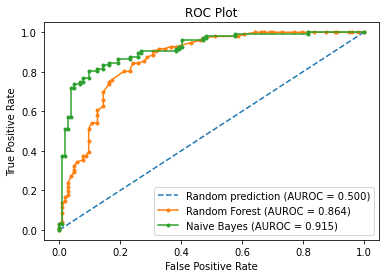

In [65]:
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In [66]:
# Import the logistic regression model from sklearn 
from sklearn.linear_model import LogisticRegression

In [67]:
# Define the model
model = LogisticRegression(random_state=0, solver='lbfgs',
                            multi_class='multinomial')

In [68]:
# Load libraries
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

In [69]:
# Create feature matrix and target vector
features, target = make_classification(n_samples=10000,
                                      n_features=10,
                                      n_informative=3,
                                      random_state=3)

In [70]:
# Split into training and tests
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.1, random_state=1)

In [71]:
# create classifier
logit = LogisticRegression()

In [72]:
# Train model
logit.fit(features_train, target_train)

LogisticRegression()

In [73]:
# Get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]

In [74]:
# Get predicted probabilities
false_positive_rate, true_positive_rate, threashold = roc_curve(target_test, target_probabilities)

C:\Users\Yousof\AppData\Local\Temp/ipykernel_3444/351786677.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot([0, 1], Ls='--')


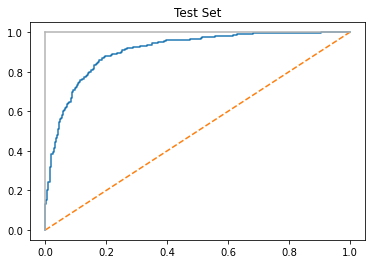

In [75]:
# Plot ROC curve
plt.title("Test Set")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], Ls='--')
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
#plt.ylable("True Positive Rte")
#plt.xlable("False Positive Rte")
plt.show()


In [76]:

# Initialize a logistic regression model 
logistic = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
# Train the model
logistic = logistic.fit(x_train, y_train)
# Print score of model(using test dataset)
print(logistic.score(x_test, y_test))


0.87


# Step 6: Find the model accuracy on the test set.


In [77]:
from sklearn.model_selection import cross_val_score

In [78]:
cross_val_score(logit, x, y, scoring = "accuracy")

array([0.89 , 0.875, 0.91 , 0.905, 0.915])

In [79]:
cross_val_score(logit, x, y, scoring = "precision")

array([0.8989899 , 0.85714286, 0.91      , 0.90909091, 0.91089109])

In [80]:
cross_val_score(logit, x, y, scoring = "recall")

array([0.88118812, 0.9       , 0.91      , 0.9       , 0.92      ])

In [81]:
cross_val_score(logit, x, y, scoring = "f1")

array([0.89      , 0.87804878, 0.91      , 0.90452261, 0.91542289])

In [82]:
# Create training and test test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)

In [83]:
# Predict values for training target vector
y_hat = logit.fit(x_train, y_train).predict(x_test)

In [84]:
# Calculate accuracy
accuracy_score(y_test, y_hat)

0.91

# Step 7: Create a confusion matrix for the test set predictions.

In [85]:
#y_pred_forest  = forest.predict(X_test)
y_pred_logistic  = logistic.predict(x_test)

In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix_logistic = confusion_matrix(y_test, y_pred_logistic, labels=[1,0])
confusion_matrix_logistic

array([[38,  3],
       [ 5, 54]], dtype=int64)

Text(0.5, 1.0, 'Confusion matrix Logistic Regression')

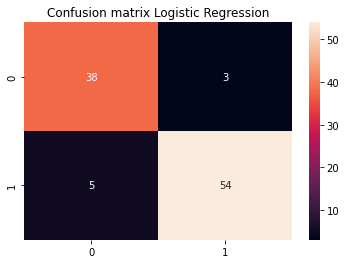

In [87]:
# plot the confusion matrix
ax = plt.axes()
sns.heatmap(confusion_matrix_logistic, annot=True, fmt="d")
ax.set_title('Confusion matrix Logistic Regression')

Text(0.5, 1.0, 'Confusion matrix Logistic Regression')

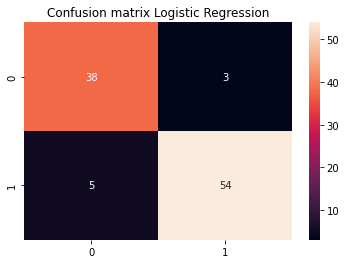

In [88]:
# plot the confusion matrix
ax = plt.axes()
sns.heatmap(confusion_matrix_logistic, annot=True, fmt="d")
ax.set_title('Confusion matrix Logistic Regression')

# Step 8: Get the precision, recall, and F1-score for the test set predictions.

In [89]:
from sklearn.metrics import classification_report
import pandas as pd

In [90]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [91]:
# Fit the SVC model
#
svc = SVC(kernel='linear', C=10.0, random_state=1)
svc.fit(x_train, y_train)

SVC(C=10.0, kernel='linear', random_state=1)

In [92]:
# Get the predictions
y_pred = svc.predict(x_test)

In [93]:
print('Precision: %.3f' % precision_score(y_test, y_pred))

Precision: 0.844


In [94]:
print('Recall: %.3f' % recall_score(y_test, y_pred))

Recall: 0.927


In [95]:
print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Accuracy: 0.900


In [96]:
#print('f1: %.3f' % accuracy_score(y_test, y_pred))

In [97]:
cross_val_score(logit, x, y, scoring = "f1")

array([0.89      , 0.87804878, 0.91      , 0.90452261, 0.91542289])

In [98]:
#print(classification_report(truth, prediction))

# Step 10: Pick another classification model you learned about this week and repeat steps (5) – (9).

In [99]:
# Import linear regretion model
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [100]:
from sklearn import linear_model

In [101]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [102]:
# Use scikit-learn’s fit method to train this model on our training data.
clf.fit(x_train,y_train)

LinearRegression()

In [103]:
# Using the following statement to examine each of the model’s coefficients.
clf.predict(x_test)

array([ 0.74260137,  0.48953374,  0.53431141,  0.30526222,  0.12246751,
        0.39172365,  0.33849525,  0.09491843, -0.09591363, -0.20436951,
        0.79591934,  0.48353864,  0.41147605,  0.63511728,  0.2739905 ,
       -0.00619468,  0.30871849,  1.36980038,  0.60335696,  0.2150073 ,
        0.28541829, -0.26538195,  0.34410463, -0.4756796 , -0.15289413,
        0.19490756,  0.164653  , -0.21712384,  0.34842561,  1.17690751,
        0.14849966,  0.69239406,  0.85710969,  0.50836046,  1.12983819,
        1.02844199,  0.3948693 ,  0.74207978,  0.86349649,  0.69522718,
        0.602143  ,  0.8935701 ,  0.73586481,  0.06974728,  0.85261573,
        0.69856086,  0.02211717,  0.78915679, -0.00460779,  1.09436794,
       -0.00252706,  1.08711367,  1.07128876, -0.18344391,  1.13838585,
        0.25523542,  0.99350949,  0.62397148,  0.31726622,  0.2919128 ,
       -0.18551849,  0.119113  ,  0.69469026,  0.80334701, -0.06504879,
        0.03810635,  0.82402268,  0.29779372,  0.51921713,  0.41

In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1)
linmod2 = LinearRegression().fit(x_train,y_train)

In [105]:
df.columns

Index(['id', 'sentiment', 'review', 'review_pol_sub', 'polarity',
       'subjectivity', 'newReview', 'review_nostop', 'review_stemmed'],
      dtype='object')

In [106]:
print(linmod2.intercept_)
print(linmod2.coef_)

list(zip(['sentiment'],linmod2.coef_))

0.4803073462939624
[0.01970847 0.30669946]


[('sentiment', 0.019708465652031763)]

In [107]:
X = df.iloc[:, 1:2].values
y = df.iloc[:, 2].values

C:\Users\Yousof\AppData\Local\Temp/ipykernel_3444/1425236963.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot([0, 1], Ls='--')


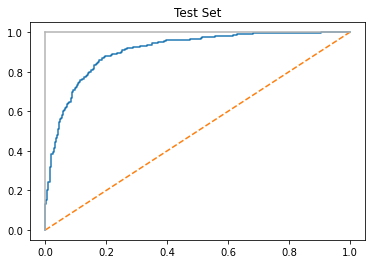

In [108]:
# Plot ROC curve
plt.title("Test Set")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], Ls='--')
plt.plot([0, 0], [1, 0], c=".7"), plt.plot([1, 1], c=".7")
#plt.ylable("True Positive Rte")
#plt.xlable("False Positive Rte")
plt.show()